In [ ]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,  roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("UCI_Credit_Card.csv")

In [ ]:
x=df.loc[:,df.columns!='default.payment.next.month'].values[:,1:]
x1=df.loc[:,df.columns!='default.payment.next.month']
y=df.loc[:,'default.payment.next.month'].values
y1=df.loc[:,'default.payment.next.month']

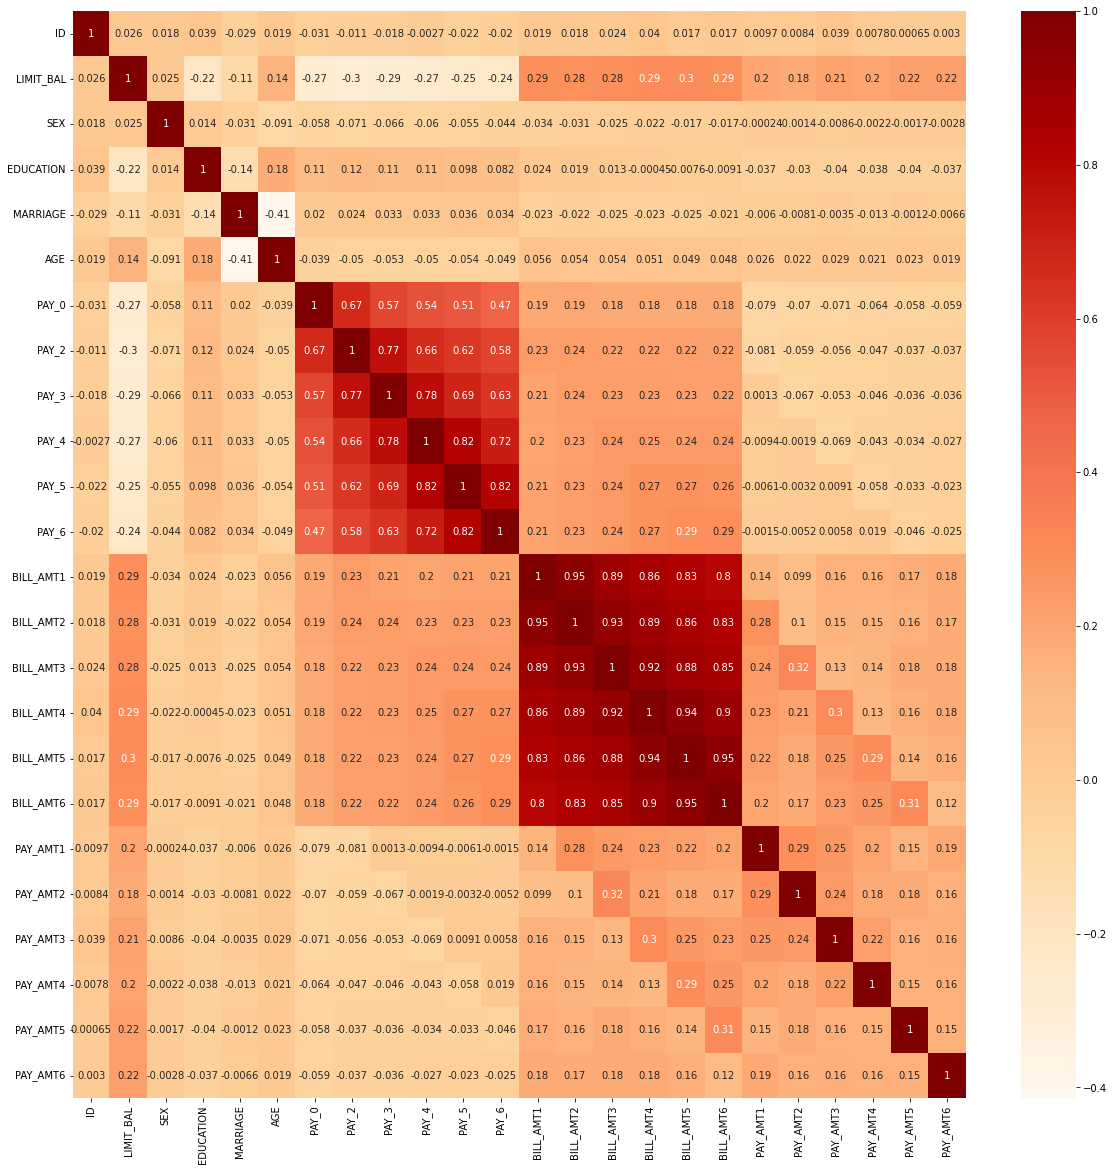

In [ ]:
correl=x1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correl,annot=True,cmap='OrRd')
plt.show()

In [ ]:
def corr_feature_detect(data,threshold):
    """ detect highly-correlated features of a Dataframe
    Parameters
    ----------
    data : pd.Dataframe
    threshold : threshold to identify the variable correlated
        
    Returns
    -------
    pairs of correlated variables
    """
    
    corrmat = data.corr()
    corrmat = corrmat.abs().unstack() # absolute value of corr coef
    corrmat = corrmat.sort_values(ascending=False)
    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1] # remove the digonal
    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
   
    grouped_feature_ls = []
    correlated_groups = []
    
    for feature in corrmat.feature1.unique():
        if feature not in grouped_feature_ls:
    
            # find all features correlated to a single feature
            correlated_block = corrmat[corrmat.feature1 == feature]
            grouped_feature_ls = grouped_feature_ls + list(
                correlated_block.feature2.unique()) + [feature]
    
            # append the block of features to the list
            correlated_groups.append(correlated_block)
    return correlated_groups


In [ ]:
corr_feature_detect(df,threshold=0.95)

[    feature1   feature2      corr
 0  BILL_AMT1  BILL_AMT2  0.951484]

In [ ]:
df = pd.read_csv("UCI_Credit_Card.csv")

In [ ]:
df.drop(['ID', 'BILL_AMT1', 'BILL_AMT2'],axis=1, inplace=True)

In [ ]:
X = df.drop('default.payment.next.month',axis=1).values
y = df['default.payment.next.month'].values

In [ ]:
from imblearn.over_sampling import KMeansSMOTE
from imblearn.combine import SMOTEENN
smote_kmeans = SMOTEENN()
X_smotekmeans, y_smotekmeans = smote_kmeans.fit_resample(X, y)

In [ ]:
from collections import Counter
print("Before SMOTE :" , Counter(y))
print("After SMOTE :" , Counter(y_smotekmeans))

Before SMOTE : Counter({0: 23364, 1: 6636})
After SMOTE : Counter({1: 16622, 0: 10585})


In [ ]:
# Single classifier based models
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
dt = DecisionTreeClassifier()
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

# Ensemble Modles
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
rf = RandomForestClassifier(n_estimators = 100) 
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
import xgboost as xgb
xgb = xgb.XGBClassifier()
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()

In [ ]:
#Accuracy(Logistic Regression)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

  
for train_index, test_index in skf.split(X_smotekmeans, y_smotekmeans):
    x_train_fold, x_test_fold = X_smotekmeans[train_index], X_smotekmeans[test_index]
    y_smotekmeans_train_fold, y_smotekmeans_test_fold = y_smotekmeans[train_index], y_smotekmeans[test_index]
    lr.fit(x_train_fold, y_smotekmeans_train_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_smotekmeans_test_fold))


# Print the output.
print('Cross validation accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Cross validation accuracy: [0.7118706357956633, 0.729143697170158, 0.7089305402425579, 0.7126056596839397, 0.7232635060639471, 0.7140757074604924, 0.7001102535832414, 0.6970588235294117, 0.7069852941176471, 0.7213235294117647]

Maximum Accuracy That can be obtained from this model is: 72.9143697170158 %

Minimum Accuracy: 69.70588235294117 %

Overall Accuracy: 71.25367647058823 %

Standard Deviation is: 0.010048138364850873


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#F1_score(Logistic Regression)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

  
for train_index, test_index in skf.split(X_smotekmeans, y_smotekmeans):
    x_train_fold, x_test_fold = X_smotekmeans[train_index], X_smotekmeans[test_index]
    y_smotekmeans_train_fold, y_smotekmeans_test_fold = y_smotekmeans[train_index], y_smotekmeans[test_index]
    lr.fit(x_train_fold, y_smotekmeans_train_fold)
    pred_values = lr.predict(x_test_fold)
    acc = f1_score(pred_values , y_smotekmeans_test_fold)
    lst_accu_stratified.append(acc)  

# Print the output.
lst_accu_stratified = sum(lst_accu_stratified)/10
print('F1 score:', format(lst_accu_stratified))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

F1 score: 0.790380533061487


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Accuracy(K Nearest Neighbor)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

  
for train_index, test_index in skf.split(X_smotekmeans, y_smotekmeans):
    x_train_fold, x_test_fold = X_smotekmeans[train_index], X_smotekmeans[test_index]
    y_smotekmeans_train_fold, y_smotekmeans_test_fold = y_smotekmeans[train_index], y_smotekmeans[test_index]
    knn.fit(x_train_fold, y_smotekmeans_train_fold)
    lst_accu_stratified.append(knn.score(x_test_fold, y_smotekmeans_test_fold))


# Print the output.
print('Cross validation accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

Cross validation accuracy: [0.8860712973171628, 0.8919514884233738, 0.8732083792723263, 0.8956266078647556, 0.8842337375964718, 0.8908489525909592, 0.8857037853730246, 0.8801470588235294, 0.8841911764705882, 0.875]

Maximum Accuracy That can be obtained from this model is: 89.56266078647556 %

Minimum Accuracy: 87.32083792723263 %

Overall Accuracy: 88.46982483732192 %

Standard Deviation is: 0.007149400866845392


In [ ]:
#F1_score(K Nearest Neighbor)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

  
for train_index, test_index in skf.split(X_smotekmeans, y_smotekmeans):
    x_train_fold, x_test_fold = X_smotekmeans[train_index], X_smotekmeans[test_index]
    y_smotekmeans_train_fold, y_smotekmeans_test_fold = y_smotekmeans[train_index], y_smotekmeans[test_index]
    knn.fit(x_train_fold, y_smotekmeans_train_fold)
    pred_values = knn.predict(x_test_fold)
    acc = f1_score(pred_values , y_smotekmeans_test_fold)
    lst_accu_stratified.append(acc)  

# Print the output.
lst_accu_stratified = sum(lst_accu_stratified)/10
print('F1 score:', format(lst_accu_stratified))

F1 score: 0.9100807094509937


In [ ]:
#Accuracy(Gradient Boosting)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

  
for train_index, test_index in skf.split(X_smotekmeans, y_smotekmeans):
    x_train_fold, x_test_fold = X_smotekmeans[train_index], X_smotekmeans[test_index]
    y_smotekmeans_train_fold, y_smotekmeans_test_fold = y_smotekmeans[train_index], y_smotekmeans[test_index]
    gb.fit(x_train_fold, y_smotekmeans_train_fold)
    lst_accu_stratified.append(gb.score(x_test_fold, y_smotekmeans_test_fold))


# Print the output.
print('Cross validation accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

Cross validation accuracy: [0.8981991914737228, 0.9084895259095921, 0.8948915839764793, 0.9040793825799338, 0.9022418228592429, 0.9048144064682102, 0.9051819184123484, 0.8897058823529411, 0.9044117647058824, 0.9058823529411765]

Maximum Accuracy That can be obtained from this model is: 90.84895259095921 %

Minimum Accuracy: 88.97058823529412 %

Overall Accuracy: 90.1789783167953 %

Standard Deviation is: 0.005784175347154137


In [ ]:
#F1_score(Gradient Boosting)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

  
for train_index, test_index in skf.split(X_smotekmeans, y_smotekmeans):
    x_train_fold, x_test_fold = X_smotekmeans[train_index], X_smotekmeans[test_index]
    y_smotekmeans_train_fold, y_smotekmeans_test_fold = y_smotekmeans[train_index], y_smotekmeans[test_index]
    gb.fit(x_train_fold, y_smotekmeans_train_fold)
    pred_values = gb.predict(x_test_fold)
    acc = f1_score(pred_values , y_smotekmeans_test_fold)
    lst_accu_stratified.append(acc)  

# Print the output.
lst_accu_stratified = sum(lst_accu_stratified)/10
print('F1 score:', format(lst_accu_stratified))

F1 score: 0.9174999908485771


In [ ]:
#Accuracy(XGBoost)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

  
for train_index, test_index in skf.split(X_smotekmeans, y_smotekmeans):
    x_train_fold, x_test_fold = X_smotekmeans[train_index], X_smotekmeans[test_index]
    y_smotekmeans_train_fold, y_smotekmeans_test_fold = y_smotekmeans[train_index], y_smotekmeans[test_index]
    xgb.fit(x_train_fold, y_smotekmeans_train_fold)
    lst_accu_stratified.append(xgb.score(x_test_fold, y_smotekmeans_test_fold))


# Print the output.
print('Cross validation accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

Cross validation accuracy: [0.896361631753032, 0.9066519661889011, 0.8941565600882029, 0.9048144064682102, 0.900404263138552, 0.9040793825799338, 0.9026093348033811, 0.8893382352941176, 0.9047794117647059, 0.9073529411764706]

Maximum Accuracy That can be obtained from this model is: 90.73529411764706 %

Minimum Accuracy: 88.93382352941175 %

Overall Accuracy: 90.10548133255507 %

Standard Deviation is: 0.005943058810679934


In [ ]:
#F1_score(XGBoost)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

  
for train_index, test_index in skf.split(X_smotekmeans, y_smotekmeans):
    x_train_fold, x_test_fold = X_smotekmeans[train_index], X_smotekmeans[test_index]
    y_smotekmeans_train_fold, y_smotekmeans_test_fold = y_smotekmeans[train_index], y_smotekmeans[test_index]
    xgb.fit(x_train_fold, y_smotekmeans_train_fold)
    pred_values = xgb.predict(x_test_fold)
    acc = f1_score(pred_values , y_smotekmeans_test_fold)
    lst_accu_stratified.append(acc)  

# Print the output.
lst_accu_stratified = sum(lst_accu_stratified)/10
print('F1 score:', format(lst_accu_stratified))

F1 score: 0.9167212607089897


In [ ]:
#Accuracy(AdaBoost)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

  
for train_index, test_index in skf.split(X_smotekmeans, y_smotekmeans):
    x_train_fold, x_test_fold = X_smotekmeans[train_index], X_smotekmeans[test_index]
    y_smotekmeans_train_fold, y_smotekmeans_test_fold = y_smotekmeans[train_index], y_smotekmeans[test_index]
    adb.fit(x_train_fold, y_smotekmeans_train_fold)
    lst_accu_stratified.append(adb.score(x_test_fold, y_smotekmeans_test_fold))


# Print the output.
print('Cross validation accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

Cross validation accuracy: [0.8871738331495773, 0.890481440646821, 0.8750459389930173, 0.8871738331495773, 0.8879088570378537, 0.8912164645350974, 0.8912164645350974, 0.8724264705882353, 0.8889705882352941, 0.8944852941176471]

Maximum Accuracy That can be obtained from this model is: 89.44852941176471 %

Minimum Accuracy: 87.24264705882354 %

Overall Accuracy: 88.66099184988218 %

Standard Deviation is: 0.007166609121406394


In [ ]:
#F1_score(AdaBoost)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

  
for train_index, test_index in skf.split(X_smotekmeans, y_smotekmeans):
    x_train_fold, x_test_fold = X_smotekmeans[train_index], X_smotekmeans[test_index]
    y_smotekmeans_train_fold, y_smotekmeans_test_fold = y_smotekmeans[train_index], y_smotekmeans[test_index]
    adb.fit(x_train_fold, y_smotekmeans_train_fold)
    pred_values = adb.predict(x_test_fold)
    acc = f1_score(pred_values , y_smotekmeans_test_fold)
    lst_accu_stratified.append(acc)  

# Print the output.
lst_accu_stratified = sum(lst_accu_stratified)/10
print('F1 score:', format(lst_accu_stratified))

F1 score: 0.9046352593992569
